In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile

archive = zipfile.ZipFile('./dataset/Faces.zip', 'r')
files = {name: archive.read(name) for name in archive.namelist() if name.endswith('.pgm')}
pic_height = 112
pic_width = 92
# load pics ti np array
pics = np.zeros((50, pic_height, pic_width))
labels = np.repeat(range(1, 6), 10)
pic_header = len(b'P5\n92 112\n255\n')
for i, k in enumerate(files):
    # read pgm, https://stackoverflow.com/questions/7368739/numpy-and-16-bit-pgm
    pics[i] = np.frombuffer(files[k], dtype='u1', count=pic_width*pic_height, offset=pic_header).reshape((pic_height, pic_width))

# normalize pics
pics_norm = pics/ 255
feature = pics_norm.reshape(50, -1) 

In [15]:
# for picture, using np svd (not the way of sklearn does)
# https://www.itread01.com/content/1547405346.html
# https://www.cnblogs.com/jclian91/p/8024101.html
# 
def pca_svd(data, n=2, mean=0):
    """
    :param data: 
    :param n: 
    :param mean: 決定data是不是要減掉mean
    :return: 
    """
    org_data = data
    if mean:
        data = data - np.mean(data.T, axis=1)
    cov = np.cov(data)
    # cov_Mat = np.dot(data.T, data)/ data.shape[0]
    # 使用svd的速度比eig快上很多
    u, d, v = np.linalg.svd(cov)
    print(u.shape, d.shape, v.shape)
    T2 = np.dot(org_data.T, u[:, :n]) # transformed data
    return T2, v[:, :n]

import datetime
t0 = datetime.datetime.now()
a, b = pca_svd(feature, 5, 1)
print(datetime.datetime.now() - t0)

(50, 50) (50,) (50, 50)
0:00:00.006510


In [7]:
print(b.shape, a.shape)

(50, 5) (10304, 5)


In [6]:
from sklearn.decomposition import PCA
pca = PCA(5)
pca5 = pca.fit(feature)  # pca5.components_ 為(5, 92)應該是eigenvector
print(pca5.components_[0].shape)

(10304,)


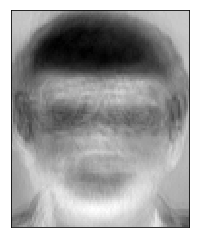

In [17]:
# sklearn pca result
plt.imshow(pca5.components_[0].reshape(112, 92), cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

In [10]:
print(a.T[0])
print(pca5.components_[0])

[-2.56853774 -2.55372089 -2.5715972  ... -2.35649847 -2.3372252
 -2.19481825]
[ 0.01331735  0.01332086  0.01312621 ... -0.00452423 -0.00408629
 -0.00170831]


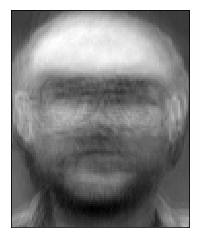

In [13]:
plt.imshow(a.T[0].reshape(112, 92), cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

(50, 50) (50,) (50, 50)


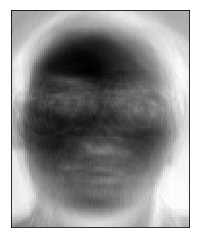

In [16]:
# 沒有減mean的結果
a, b = pca_svd(feature, 5)
plt.imshow(a.T[0].reshape(112, 92), cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()